<a href="https://colab.research.google.com/github/dzulwulann/Bellabeat_dataproject/blob/main/Bellabeat_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##LOAD DATA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bellabeat_capstone project/Daily_Activity.csv')

In [ ]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories

##Are user more active on weekdays or weekends ?

In [ ]:
#Duplicate table
daily_activity = df

To better understand user behavior across the week, I first converted the date column into **the day name** (e.g., Monday, Tuesday). This allows us to analyze patterns based on the day of the week rather than specific calendar dates.

In [ ]:
#Convert date to day of week
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
daily_activity['DayofWeek'] = daily_activity['ActivityDate'].dt.day_name()

In [ ]:
print(daily_activity[['ActivityDate','DayofWeek']].head())

  ActivityDate DayofWeek
0   2016-03-25    Friday
1   2016-03-26  Saturday
2   2016-03-27    Sunday
3   2016-03-28    Monday
4   2016-03-29   Tuesday


The next step was to aggregate the data by day name, see **the average** of the total steps for each day. By doing this, we can observe whether users tend to be more or less active on certain days, which may reveal weekly behavior trends.

In [ ]:
#Finding the average of total steps each day of week

Average_steps_each_day = daily_activity.groupby('DayofWeek')['TotalSteps'].mean().reset_index()
print(Average_steps_each_day)

   DayofWeek   TotalSteps
0     Friday  7187.532663
1     Monday  7541.319149
2   Saturday  7752.271357
3     Sunday  6606.725389
4   Thursday  7268.297436
5    Tuesday  7083.511111
6  Wednesday  7547.575758


In [ ]:
#Sorting by Day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Average_steps_each_day['DayofWeek'] = pd.Categorical(Average_steps_each_day['DayofWeek'], categories=day_order, ordered=True)
avg_steps_by_day = Average_steps_each_day.sort_values('DayofWeek')
avg_steps_by_day

,DayofWeek,TotalSteps
1,Monday,7541.319149
5,Tuesday,7083.511111
6,Wednesday,7547.575758
4,Thursday,7268.297436
0,Friday,7187.532663
2,Saturday,7752.271357
3,Sunday,6606.725389


📊 Insight: Weekly User Activity Patterns
After aggregating the data by day of the week, I discovered clear behavioral patterns in how users engage with their smart devices:

🔺 **Saturday** shows the highest average step count, indicating that users are most active on this day. This suggests they may be more likely to participate in workouts or outdoor activities during the weekend.

🔻 **Sunday** has the lowest average activity, with users showing significantly reduced engagement. This may reflect a rest day or less structured physical activity among users.

📆 **Weekday activity** remains relatively stable, suggesting that many users incorporate consistent movement into their daily routines.

In [ ]:
avg_steps_by_day.describe()

,TotalSteps
count,7.000000
mean,7283.890409
std,379.344284
min,6606.725389
25%,7135.521887
50%,7268.297436
75%,7544.447453
max,7752.271357


In [ ]:
avg_steps_by_day.to_csv("average_steps_by_day.csv", index=False)

##When are users most active during the day ?

In [ ]:
#load data
df_3 = pd.read_csv('/content/drive/MyDrive/Bellabeat_capstone project/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv')
df_4 = pd.read_csv('/content/drive/MyDrive/Bellabeat_capstone project/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')

In [ ]:
def convert_to_datetime(df):
    df['ActivityHour'] = pd.to_datetime(df['ActivityHour'])# Auto-parses AM/PM
    df['ActivityHour'] = df['ActivityHour'].dt.strftime('%Y-%m-%d %H:%M:%S')
    return df

In [ ]:
#Load datas
hourly_steps_3= convert_to_datetime(df_3)
hourly_steps_4 = convert_to_datetime(df_4)

/tmp/ipython-input-6-1275055769.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ActivityHour'] = pd.to_datetime(df['ActivityHour'])# Auto-parses AM/PM
/tmp/ipython-input-6-1275055769.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ActivityHour'] = pd.to_datetime(df['ActivityHour'])# Auto-parses AM/PM


In [ ]:
#Merge hourly steps data
hourly_steps = pd.concat([hourly_steps_3, hourly_steps_4])

In [ ]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46183 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            46183 non-null  int64 
 1   ActivityHour  46183 non-null  object
 2   StepTotal     46183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
hourly_steps.describe()

,Id,StepTotal
count,4.618300e+04,46183.000000
mean,4.869715e+09,302.462963
std,2.422074e+09,677.431448
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.558610e+09,20.000000
75%,6.962181e+09,322.000000
max,8.877689e+09,10565.000000


According to the description of the data, the value of Max have large gap with 75%. I suspect there are some outliers. We will check from the diagram below  

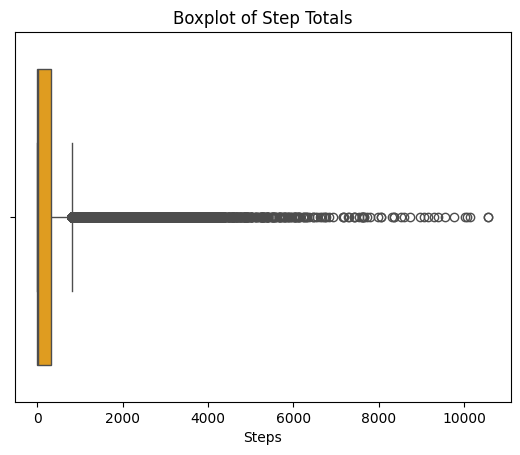

In [ ]:
#Plot to see the ourlier
sns.boxplot(x=hourly_steps['StepTotal'], color='orange')
plt.title('Boxplot of Step Totals')
plt.xlabel('Steps')
plt.show()

Values above 10,000 steps/hour were identified as outliers, appearing in <1% of the data and often tied to a single user. These were excluded from general analysis to better reflect typical usage patterns.

In [ ]:
filtered_hourly_steps= hourly_steps[hourly_steps['StepTotal']<10000]
filtered_hourly_steps

,Id,ActivityHour,StepTotal
0,1503960366,2016-03-12 00:00:00,0
1,1503960366,2016-03-12 01:00:00,0
2,1503960366,2016-03-12 02:00:00,0
3,1503960366,2016-03-12 03:00:00,0
4,1503960366,2016-03-12 04:00:00,0
...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514
22095,8877689391,2016-05-12 11:00:00,1407
22096,8877689391,2016-05-12 12:00:00,3135
22097,8877689391,2016-05-12 13:00:00,307


In [ ]:
filtered_hourly_steps.describe()

,Id,StepTotal
count,4.617800e+04,46178.000000
mean,4.869281e+09,301.383624
std,2.421846e+09,669.474622
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.558610e+09,20.000000
75%,6.962181e+09,322.000000
max,8.877689e+09,9769.000000


In [ ]:
#split date and time
filtered_hourly_steps['Date'] = pd.to_datetime(filtered_hourly_steps['ActivityHour']).dt.date
filtered_hourly_steps['Time'] = pd.to_datetime(filtered_hourly_steps['ActivityHour']).dt.time


/tmp/ipython-input-13-3239089572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hourly_steps['Date'] = pd.to_datetime(filtered_hourly_steps['ActivityHour']).dt.date
/tmp/ipython-input-13-3239089572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hourly_steps['Time'] = pd.to_datetime(filtered_hourly_steps['ActivityHour']).dt.time


In [ ]:
filtered_hourly_steps.head()

,Id,ActivityHour,StepTotal,Date,Time
0,1503960366,2016-03-12 00:00:00,0,2016-03-12,00:00:00
1,1503960366,2016-03-12 01:00:00,0,2016-03-12,01:00:00
2,1503960366,2016-03-12 02:00:00,0,2016-03-12,02:00:00
3,1503960366,2016-03-12 03:00:00,0,2016-03-12,03:00:00
4,1503960366,2016-03-12 04:00:00,0,2016-03-12,04:00:00


In [ ]:
hourly_counts = filtered_hourly_steps.groupby('Time').size()
print(hourly_counts)

Time
00:00:00    1955
01:00:00    1954
02:00:00    1954
03:00:00    1952
04:00:00    1950
05:00:00    1949
06:00:00    1947
07:00:00    1945
08:00:00    1942
09:00:00    1941
10:00:00    1930
11:00:00    1923
12:00:00    1918
13:00:00    1917
14:00:00    1916
15:00:00    1909
16:00:00    1901
17:00:00    1900
18:00:00    1898
19:00:00    1899
20:00:00    1897
21:00:00    1896
22:00:00    1894
23:00:00    1891
dtype: int64


According to the data, hourly steps, "Activity data shows a ~5% lower count for hour 6, possibly due to user behavior or minor logging inconsistency."

In [ ]:
Agg_hourly_steps = filtered_hourly_steps.groupby('Time')['StepTotal'].mean().reset_index()
Agg_hourly_steps

,Time,StepTotal
0,00:00:00,43.354476
1,01:00:00,21.734903
2,02:00:00,13.702661
3,03:00:00,6.888832
4,04:00:00,11.162564
5,05:00:00,34.603899
6,06:00:00,148.062661
7,07:00:00,285.754242
8,08:00:00,395.294542
9,09:00:00,431.718187


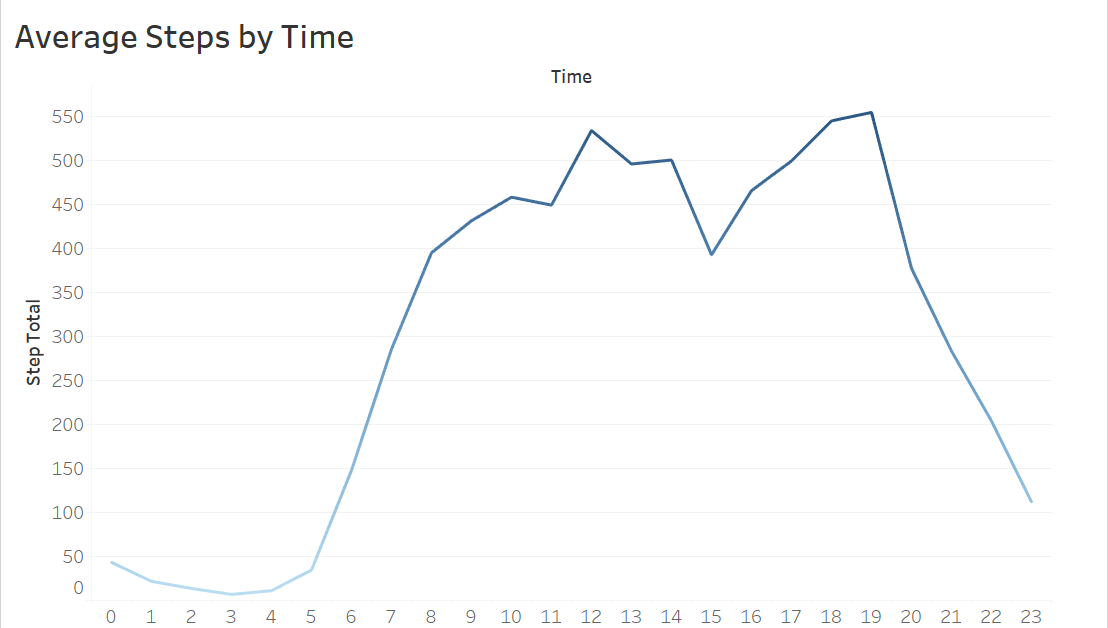

🕐 Insight: Hourly Activity Trends
Analyzing the data by hour revealed a distinct daily activity pattern among users:

☀️ Users begin their physical activity between **6 AM and 7 A**M, indicated by a noticeable rise in step counts during these early hours.

📉 After a steady increase, activity levels start to decline around **3 PM**, suggesting a midday slowdown or break period.

🔺 Interestingly, activity rises again in the late afternoon, reaching **its peak at 7 PM**. This likely reflects users engaging in workouts or evening walks after work or school hours.

🌙 **Following 7 PM**, step counts begin to decline steadily into the night, signaling the end of daily movement for most users.

This pattern suggests that Bellabeat users are most active in the morning and early evening, with a dip in the afternoon.

In [ ]:
#Save Average hourly Steps table
Agg_hourly_steps.to_csv("average_hourly_steps.csv", index=False)

##What's average sleep duration per user ?

In [ ]:
df_sleep = pd.read_csv('/content/drive/MyDrive/Bellabeat_capstone project/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')

In [ ]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [ ]:
df_sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [ ]:
df_sleep['Id'].nunique()

24

This infromation tell us that there are 24 different user in this data. We want to know the average sleep time for each user.

In [ ]:
avg_sleep = df_sleep.groupby('Id').agg({'TotalMinutesAsleep':'mean'})

In [ ]:
avg_sleep['Avg_hourlySleep'] = avg_sleep['TotalMinutesAsleep']/60

In [ ]:
avg_sleep.head()

,TotalMinutesAsleep,Avg_hourlySleep
Id,,
1503960366,360.280000,6.004667
1644430081,294.000000,4.900000
1844505072,652.000000,10.866667
1927972279,417.000000,6.950000
2026352035,506.178571,8.436310


In [ ]:
avg_sleep.to_csv("average_sleep.csv", index=False)

In [ ]:
avg_sleep[avg_sleep['Avg_hourlySleep']<7].count()

,0
TotalMinutesAsleep,12
Avg_hourlySleep,12


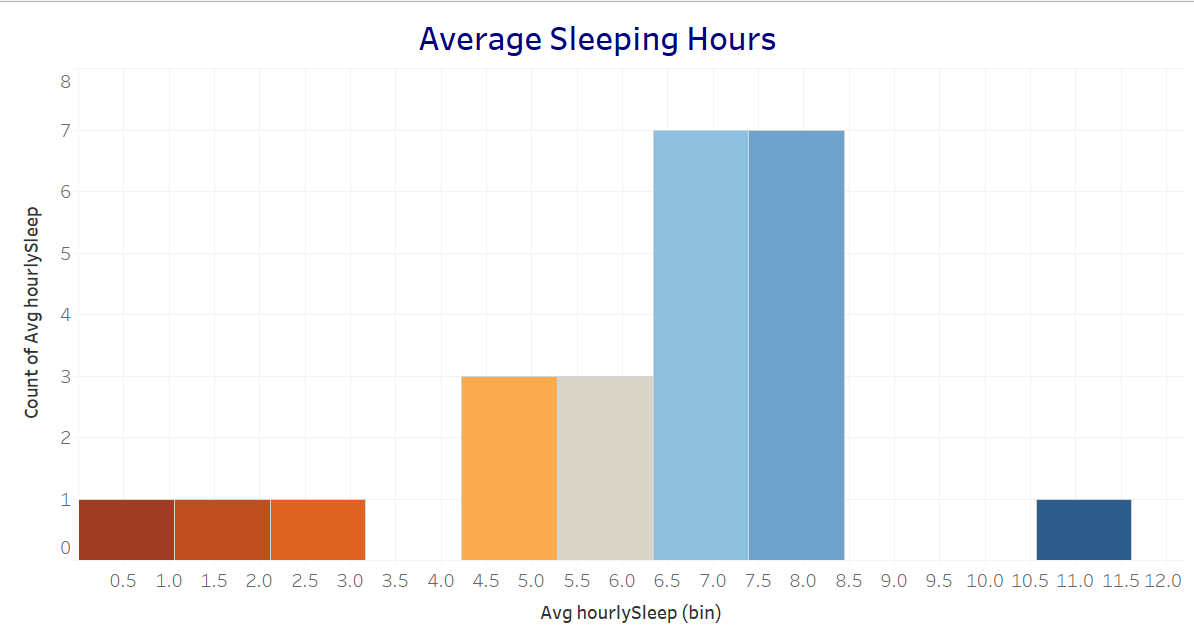

💤 Insight: Sleep Duration Among Users
An analysis of the sleep data revealed an important finding related to user wellness:

Out of 24 users in the dataset, **12 users** consistently sleep less than 7 hours per day.

This is **below** the recommended sleep duration for adults, which is typically **7 to 9** hours per night for optimal health and recovery.

This insight suggests that **half of the users** may not be getting adequate rest, which can impact both their **physical** and **mental well-being**.

# **What's next step Bellabeat could do ?**

Based on the trend activity by week period, We recommend Bellabeat to

*   Launching **activity challanges** or motivational push notifications on **Saturdays** to leverage peak enggagement and another push notification about **mindfullness features** or sleep tracking promotions on **Sunday**.
*   On day to day basis, we recommend to send **motivational reminders or workout** content before peak hours ( around 6 AM and 5-6 PM), encourage **midday recovery or mindfulness activities** around the 3 PM, promote end-of-the day **wind-down features** reminders after 8 PM.
*   Based on the sleep hour trend of our user, we recommend to encourage users to set **sleep goals** and track their sleep trends, integraye sleep coaching or recommendations into the product experience especially for user that has sleeping hour less than 6 hours a day.



